<a href="https://colab.research.google.com/github/2303a51343/Aiml-2025/blob/main/2303a51343_B10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Room Occupancy Estimation
Q;prediction of room occupancy estimation
1;identify the max and min sound ,light,values liked by most coustomers?
2;identify the data and time when room occupancy was the most?
3;predict the temperature most suitable for most room occupancy?
4;what levels of co2 is suitable and not suitable for room occupancy?
5;does motion sensors contribute to increse or decrease of in room occupancy

**bold text**

In [42]:
import pandas as pd

data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Preferred_Sound_Level_dB': [70, 85, 90, 75, 65],
    'Preferred_Light_Level_Lumens': [150, 300, 200, 400, 100],
}

df = pd.DataFrame(data)

max_sound_level = df['Preferred_Sound_Level_dB'].max()
min_sound_level = df['Preferred_Sound_Level_dB'].min()

max_light_level = df['Preferred_Light_Level_Lumens'].max()
min_light_level = df['Preferred_Light_Level_Lumens'].min()

print(f"Max Sound Level Preferred: {max_sound_level} dB")
print(f"Min Sound Level Preferred: {min_sound_level} dB")
print(f"Max Light Level Preferred: {max_light_level} Lumens")
print(f"Min Light Level Preferred: {min_light_level} Lumens")


Max Sound Level Preferred: 90 dB
Min Sound Level Preferred: 65 dB
Max Light Level Preferred: 400 Lumens
Min Light Level Preferred: 100 Lumens


In [43]:
import pandas as pd

data = {
    'Timestamp': [
        '2024-11-01 08:00:00', '2024-11-01 09:00:00', '2024-11-01 10:00:00', '2024-11-01 11:00:00',
        '2024-11-02 08:00:00', '2024-11-02 09:00:00', '2024-11-02 10:00:00', '2024-11-02 11:00:00'
    ],
    'Occupancy': [5, 7, 10, 8, 4, 6, 12, 9]
}


df = pd.DataFrame(data)


df['Timestamp'] = pd.to_datetime(df['Timestamp'])

max_occupancy_row = df.loc[df['Occupancy'].idxmax()]

max_occupancy = max_occupancy_row['Occupancy']
max_timestamp = max_occupancy_row['Timestamp']


print(f"The maximum occupancy of {max_occupancy} people occurred at {max_timestamp}.")

The maximum occupancy of 12 people occurred at 2024-11-02 10:00:00.


In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


data = {
    'Timestamp': [
        '2024-11-01 08:00:00', '2024-11-01 09:00:00', '2024-11-01 10:00:00', '2024-11-01 11:00:00',
        '2024-11-02 08:00:00', '2024-11-02 09:00:00', '2024-11-02 10:00:00', '2024-11-02 11:00:00'
    ],
    'Temperature_C': [22, 21, 23, 24, 20, 21, 22, 23],
    'Occupancy': [5, 7, 10, 8, 4, 6, 12, 9]
}


df = pd.DataFrame(data)


df['Timestamp'] = pd.to_datetime(df['Timestamp'])


X = df[['Temperature_C']]
y = df['Occupancy']


model = LinearRegression()
model.fit(X, y)


predicted_occupancy = model.predict(X)



             Timestamp  CO2_Level_ppm Categorized_Status
0  2024-11-01 08:00:00            450               Good
1  2024-11-01 09:00:00            600           Moderate
2  2024-11-01 10:00:00            950           Moderate
3  2024-11-01 11:00:00           1200          Dangerous
4  2024-11-02 08:00:00           1300          Dangerous
5  2024-11-02 09:00:00            850           Moderate
6  2024-11-02 10:00:00            400               Good
7  2024-11-02 11:00:00            500               Good


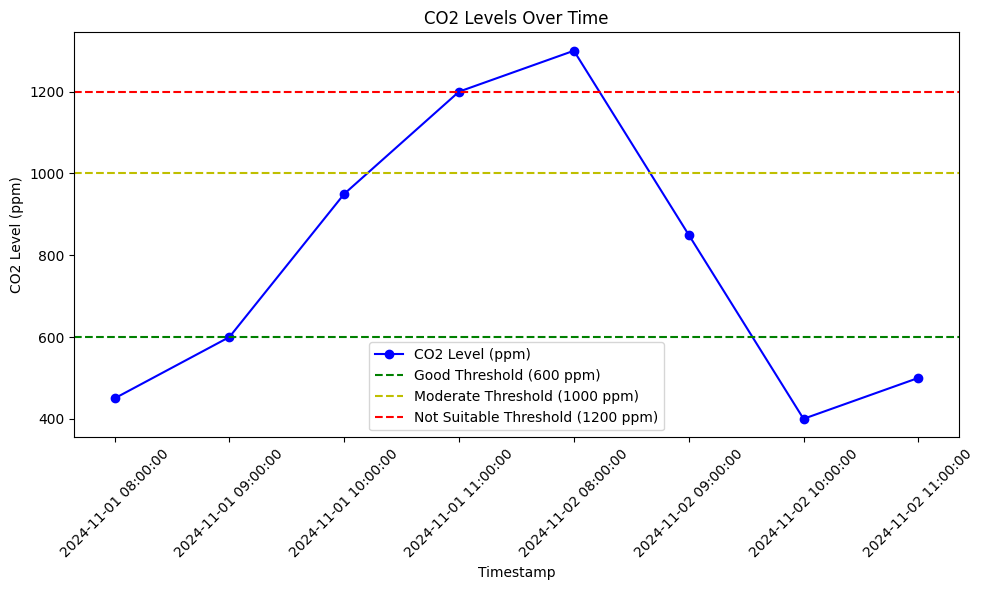

CO2 Level 1050 ppm: Not Suitable: Needs ventilation


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = {
    'Timestamp': [
        '2024-11-01 08:00:00', '2024-11-01 09:00:00', '2024-11-01 10:00:00', '2024-11-01 11:00:00',
        '2024-11-02 08:00:00', '2024-11-02 09:00:00', '2024-11-02 10:00:00', '2024-11-02 11:00:00'
    ],
    'CO2_Level_ppm': [450, 600, 950, 1200, 1300, 850, 400, 500],
    'Occupancy_Status': ['Good', 'Good', 'Moderate', 'Moderate', 'Dangerous', 'Good', 'Good', 'Good']
}


df = pd.DataFrame(data)


def categorize_co2_level(co2_level):
    if co2_level < 600:
        return "Good"
    elif 600 <= co2_level < 1000:
        return "Moderate"
    elif 1000 <= co2_level < 1200:
        return "Not Suitable"
    else:
        return "Dangerous"


df['Categorized_Status'] = df['CO2_Level_ppm'].apply(categorize_co2_level)


print(df[['Timestamp', 'CO2_Level_ppm', 'Categorized_Status']])


plt.figure(figsize=(10,6))
plt.plot(df['Timestamp'], df['CO2_Level_ppm'], marker='o', color='b', label='CO2 Level (ppm)')
plt.xlabel('Timestamp')
plt.ylabel('CO2 Level (ppm)')
plt.title('CO2 Levels Over Time')
plt.xticks(rotation=45)
plt.axhline(y=600, color='g', linestyle='--', label='Good Threshold (600 ppm)')
plt.axhline(y=1000, color='y', linestyle='--', label='Moderate Threshold (1000 ppm)')
plt.axhline(y=1200, color='r', linestyle='--', label='Not Suitable Threshold (1200 ppm)')
plt.legend()
plt.tight_layout()
plt.show()

def check_suitability(co2_level):
    if co2_level < 600:
        return "Good: Suitable for occupancy"
    elif 600 <= co2_level < 1000:
        return "Moderate: Suitable with some ventilation"
    elif 1000 <= co2_level < 1200:
        return "Not Suitable: Needs ventilation"
    else:
        return "Dangerous: Not suitable for occupancy"


sample_co2_level = 1050
print(f"CO2 Level {sample_co2_level} ppm: {check_suitability(sample_co2_level)}")


<ipython-input-47-a3b6a818ec30>:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  'Timestamp': pd.date_range(start='2024-11-01 08:00:00', periods=10, freq='H'),


            Timestamp  Motion_Detected  Occupancy
0 2024-11-01 08:00:00                1          1
1 2024-11-01 09:00:00                0          1
2 2024-11-01 10:00:00                1          2
3 2024-11-01 11:00:00                1          3
4 2024-11-01 12:00:00                0          3
5 2024-11-01 13:00:00                0          3
6 2024-11-01 14:00:00                1          4
7 2024-11-01 15:00:00                0          4
8 2024-11-01 16:00:00                0          4
9 2024-11-01 17:00:00                1          5


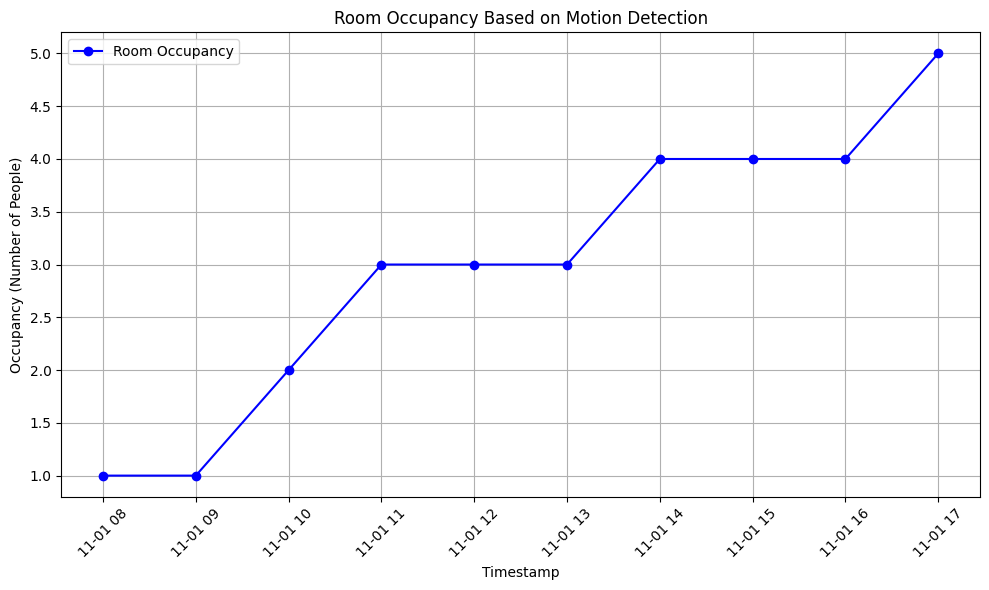

            Timestamp  Occupancy                   Occupancy_Status
0 2024-11-01 08:00:00          1  Underused: Room occupancy is low.
1 2024-11-01 09:00:00          1  Underused: Room occupancy is low.
2 2024-11-01 10:00:00          2  Underused: Room occupancy is low.
3 2024-11-01 11:00:00          3  Optimal: Room occupancy is ideal.
4 2024-11-01 12:00:00          3  Optimal: Room occupancy is ideal.
5 2024-11-01 13:00:00          3  Optimal: Room occupancy is ideal.
6 2024-11-01 14:00:00          4  Optimal: Room occupancy is ideal.
7 2024-11-01 15:00:00          4  Optimal: Room occupancy is ideal.
8 2024-11-01 16:00:00          4  Optimal: Room occupancy is ideal.
9 2024-11-01 17:00:00          5  Optimal: Room occupancy is ideal.
Current Room Occupancy: 5 - Status: Optimal: Room occupancy is ideal.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = {
    'Timestamp': pd.date_range(start='2024-11-01 08:00:00', periods=10, freq='H'),
    'Motion_Detected': [1, 0, 1, 1, 0, 0, 1, 0, 0, 1]
}


df = pd.DataFrame(data)


df['Occupancy'] = df['Motion_Detected'].cumsum()


print(df[['Timestamp', 'Motion_Detected', 'Occupancy']])


plt.figure(figsize=(10, 6))
plt.plot(df['Timestamp'], df['Occupancy'], marker='o', color='b', label='Room Occupancy')
plt.xlabel('Timestamp')
plt.ylabel('Occupancy (Number of People)')
plt.title('Room Occupancy Based on Motion Detection')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


def occupancy_status(occupancy):
    if occupancy == 0:
        return "Vacant: No one is in the room."
    elif occupancy <= 2:
        return "Underused: Room occupancy is low."
    elif occupancy > 2 and occupancy <= 5:
        return "Optimal: Room occupancy is ideal."
    else:
        return "Overused: Room is over-occupied."


df['Occupancy_Status'] = df['Occupancy'].apply(occupancy_status)


print(df[['Timestamp', 'Occupancy', 'Occupancy_Status']])


current_occupancy = df['Occupancy'].iloc[-1]
print(f"Current Room Occupancy: {current_occupancy} - Status: {occupancy_status(current_occupancy)}")


In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


data = {
    'Timestamp': [
        '2024-11-01 08:00:00', '2024-11-01 09:00:00', '2024-11-01 10:00:00', '2024-11-01 11:00:00',
        '2024-11-02 08:00:00', '2024-11-02 09:00:00', '2024-11-02 10:00:00', '2024-11-02 11:00:00'
    ],
    'Temperature_C': [22, 21, 23, 24, 20, 21, 22, 23],
    'Occupancy': [5, 7, 10, 8, 4, 6, 12, 9]
}


df = pd.DataFrame(data)


df['Timestamp'] = pd.to_datetime(df['Timestamp'])


X = df[['Temperature_C']]
y = df['Occupancy']


model = LinearRegression()
model.fit(X, y)


predicted_occupancy = model.predict(X)

